In [1]:
#coding:utf-8
import wave
import numpy as np
import matplotlib.pyplot as plt
import random

def wave_load(filename):
    # open wave file
    wf = wave.open(filename,'r')
    channels = wf.getnchannels()

    # load wave data
    chunk_size = wf.getnframes()
    amp  = (2**8) ** wf.getsampwidth() / 2
    data = wf.readframes(chunk_size)   # バイナリ読み込み
    data = np.frombuffer(data,'int16') # intに変換
    data = data / amp                  # 振幅正規化
    data = data[::channels]
   
    return data


def fft_load(count,instrument,size):
    '''
    count = グラフに入れたい数
    instrument = 楽器のディレクトリ
    size = FFTのサンプル数（２＊＊ｎ）
    start　=乱数の開始位置
    end = 乱数の終点位置

    '''
    st = 10000   # サンプリングする開始位置
    hammingWindow = np.hamming(size)    # ハミング窓
    fs = 44100 #サンプリングレート
    d = 1.0 / fs #サンプリングレートの逆数
    freqList = np.fft.fftfreq(size, d)
    
    for i in range(count):
        filename = "./bass/" + instrument+"/" + str(i+11) +".wav"
        export_dir = "./bass/" +instrument+ "/fft/" + str(i + 11) +".jpg"
        wave = wave_load(filename)
        windowedData = hammingWindow * wave[st:st+size]  # 切り出した波形データ（窓関数あり）
        data = np.fft.fft(windowedData)
        data = data / max(abs(data)) # 0~1正規化
        plt.plot(freqList,abs(data))
        plt.axis([0,fs/16,0,1]) #第二引数でグラフのy軸方向の範囲指定
        plt.savefig(export_dir)
        plt.show()
        
         
    return data

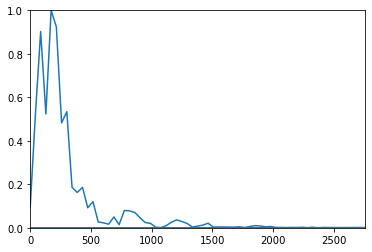

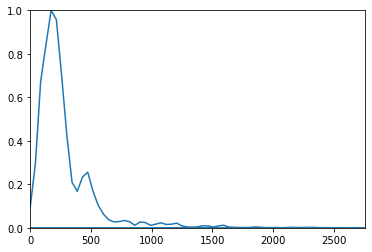

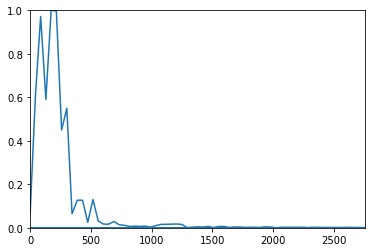

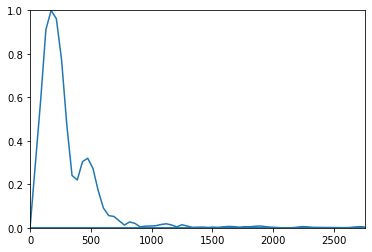

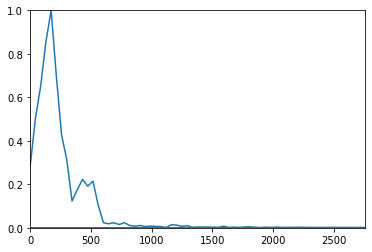

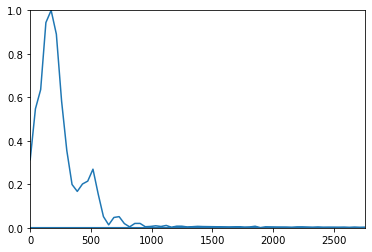

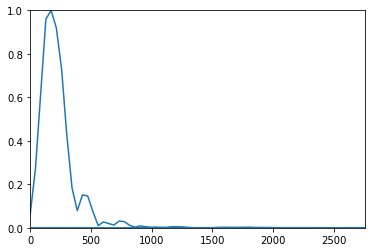

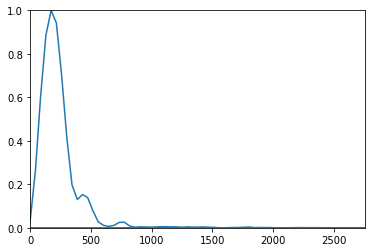

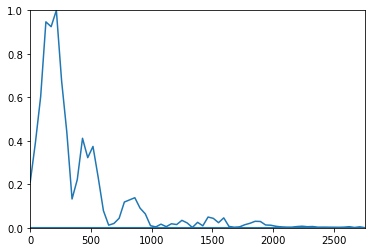

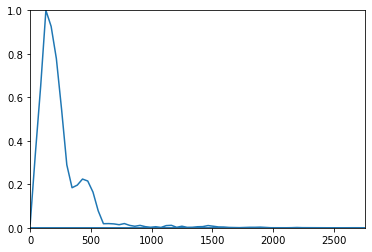

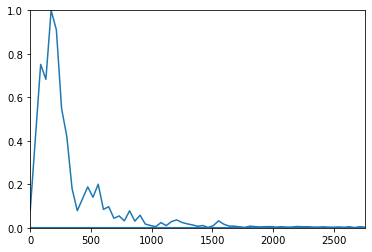

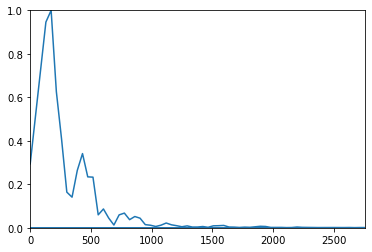

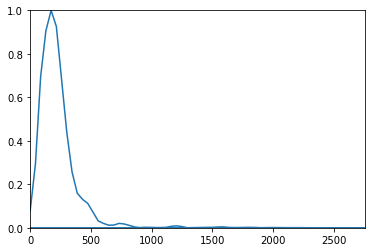

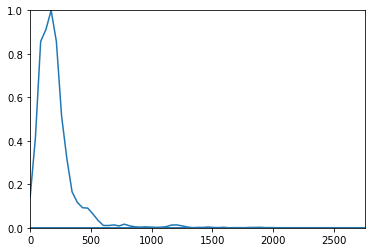

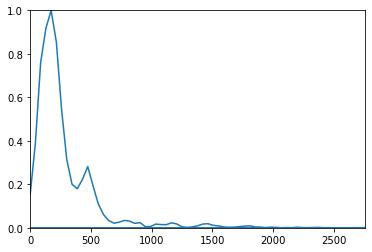

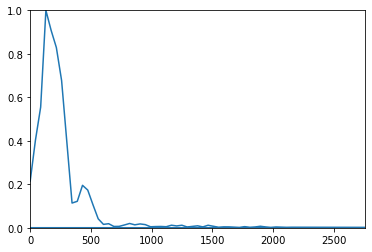

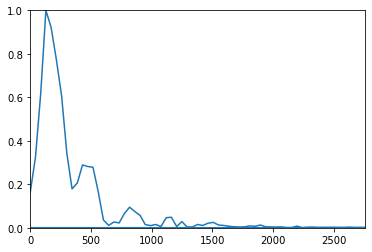

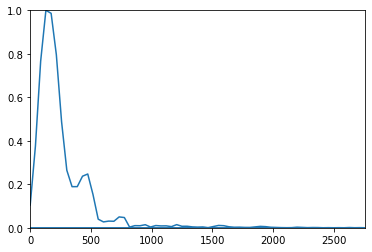

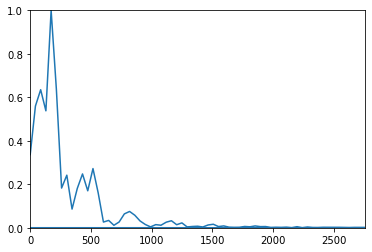

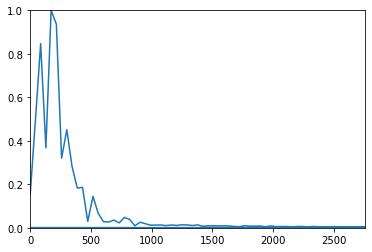

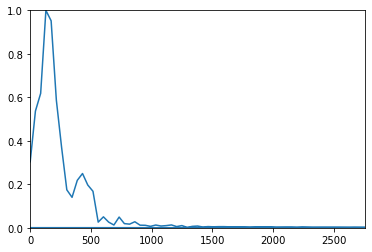

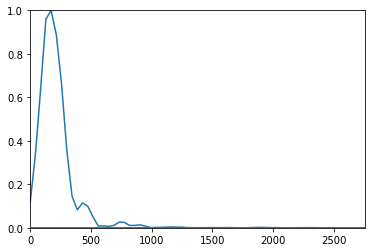

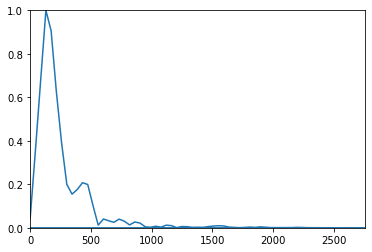

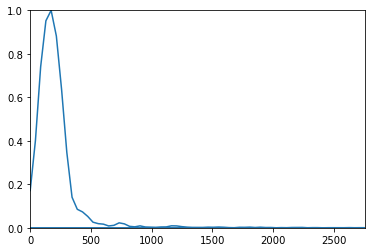

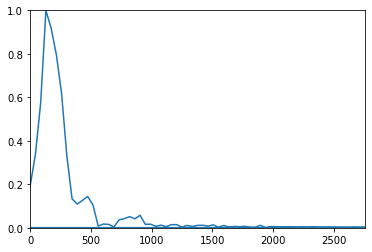

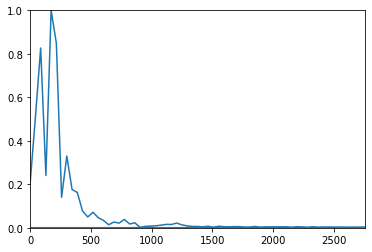

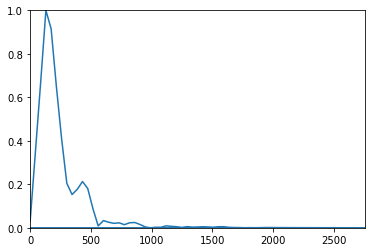

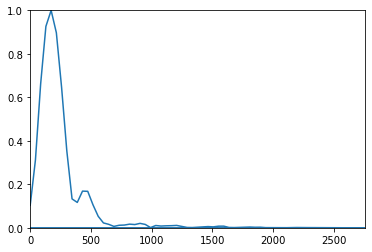

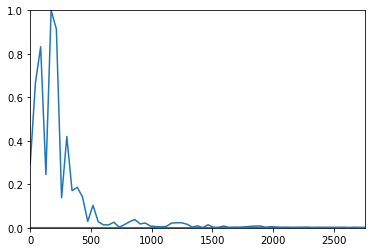

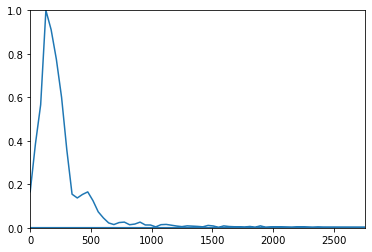

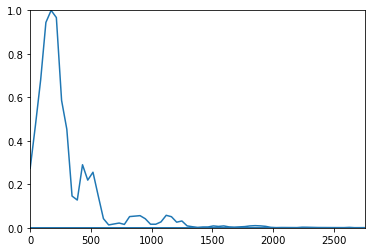

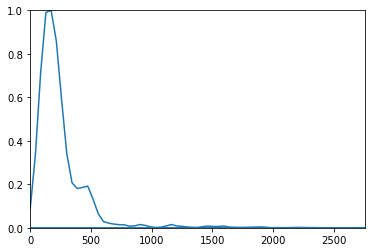

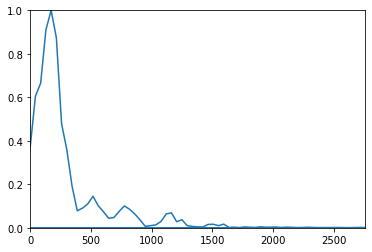

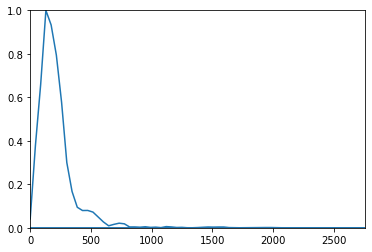

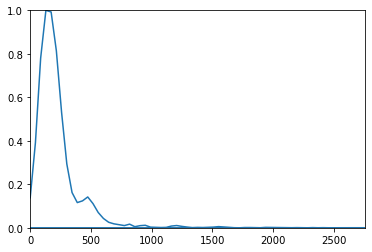

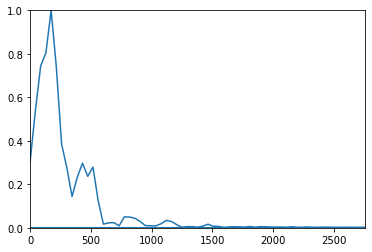

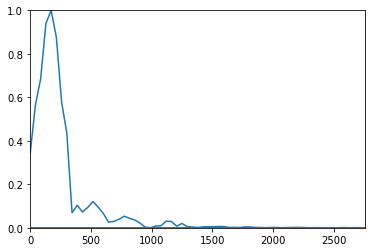

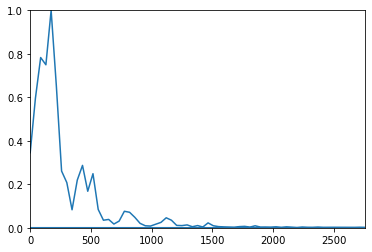

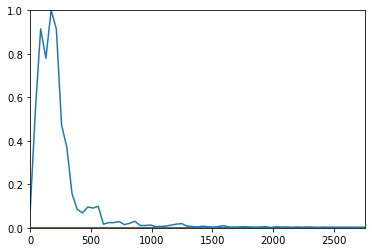

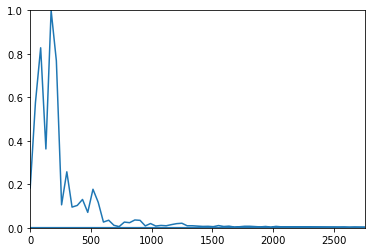

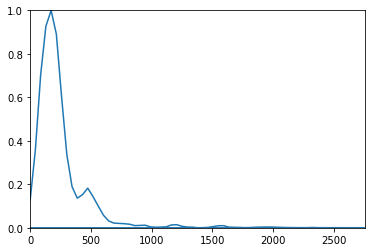

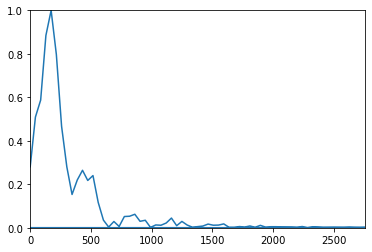

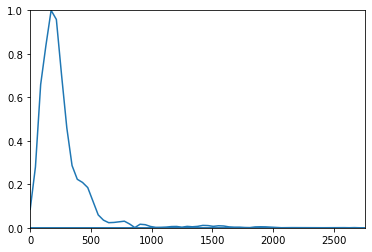

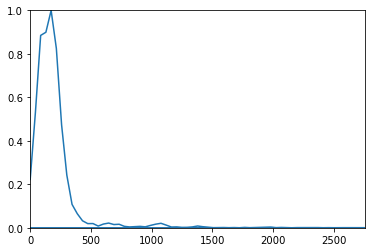

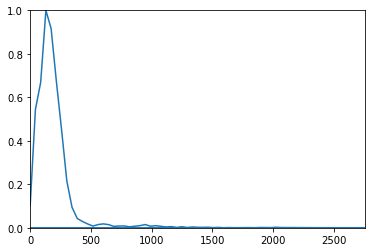

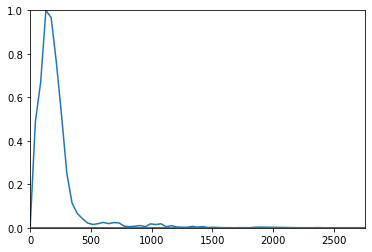

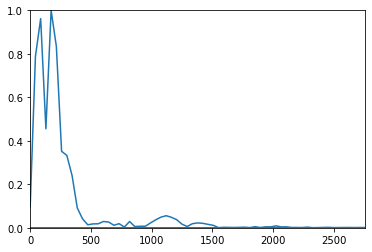

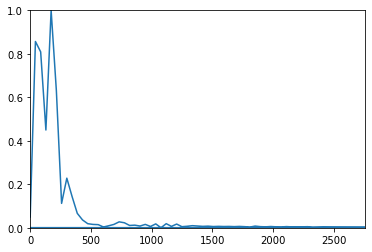

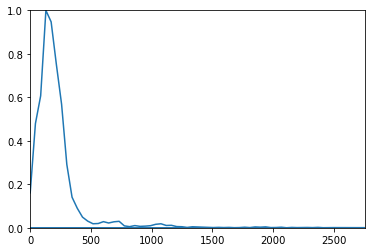

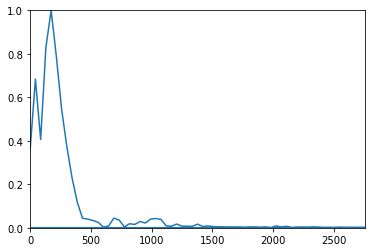

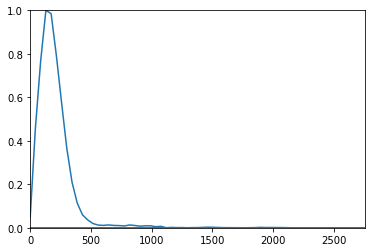

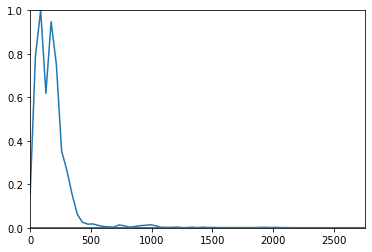

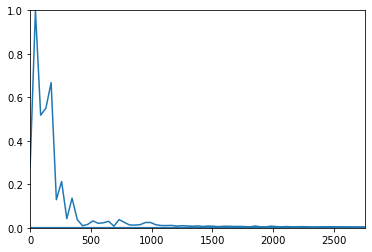

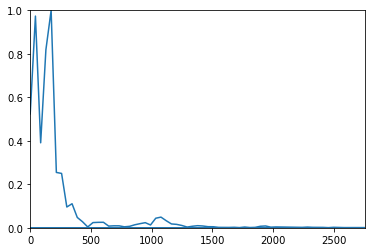

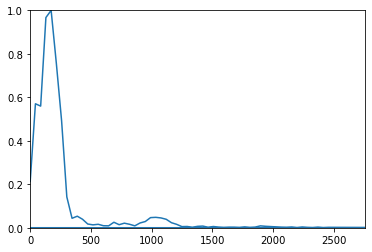

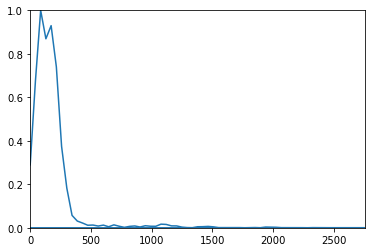

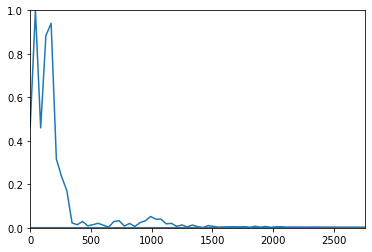

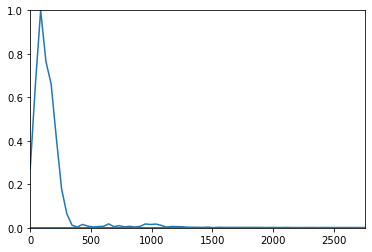

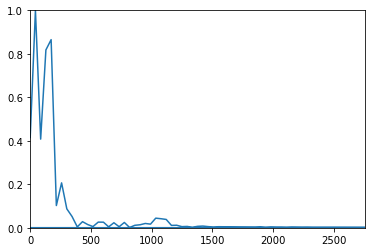

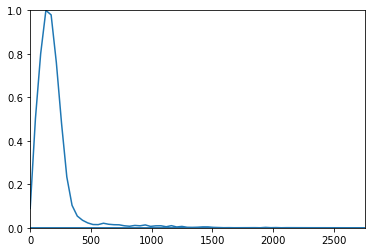

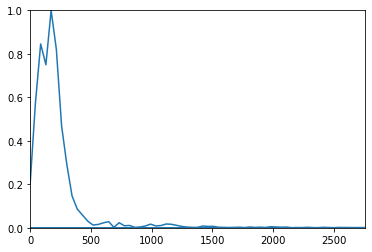

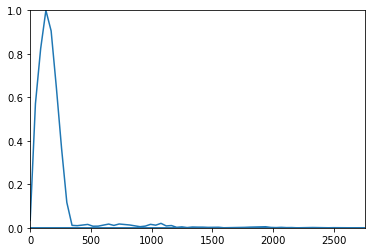

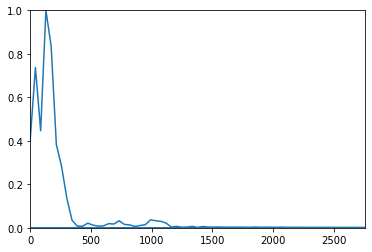

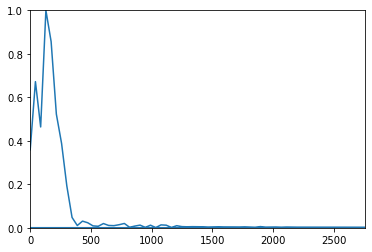

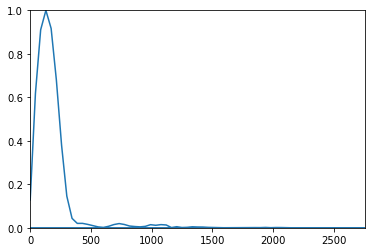

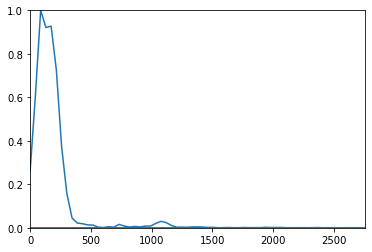

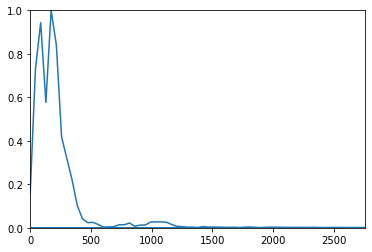

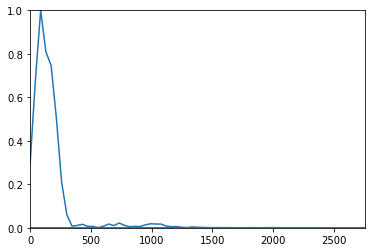

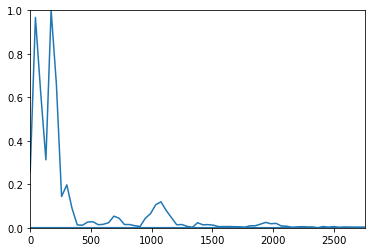

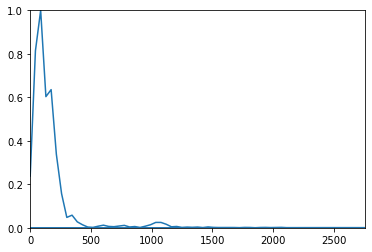

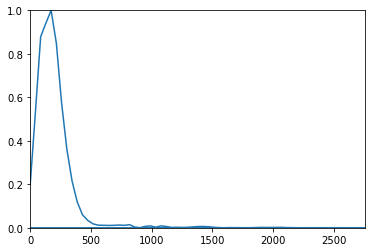

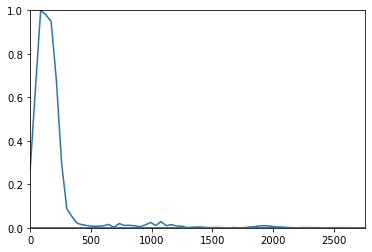

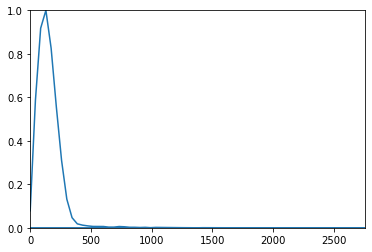

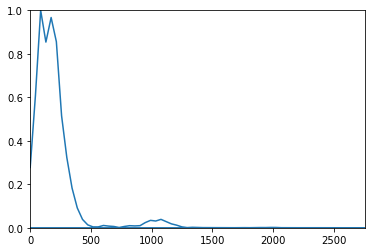

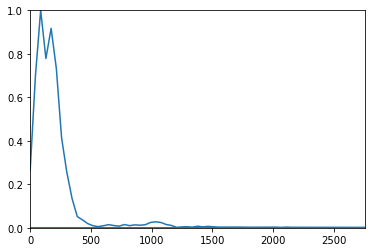

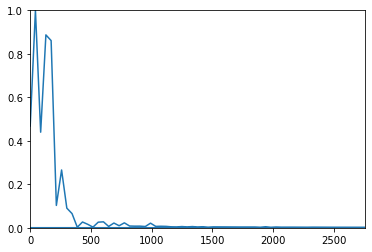

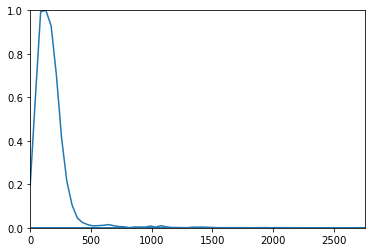

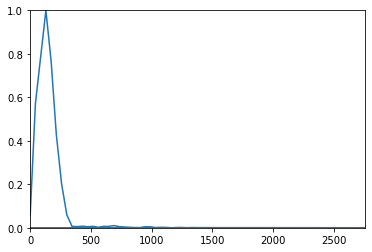

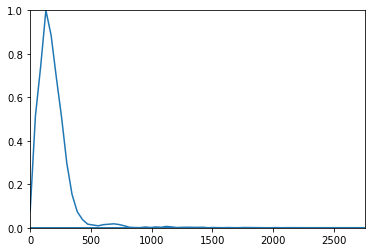

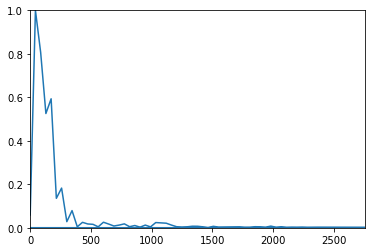

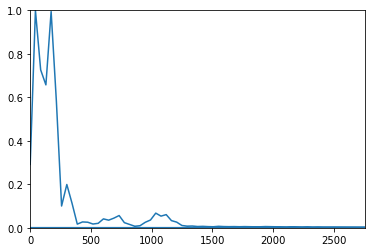

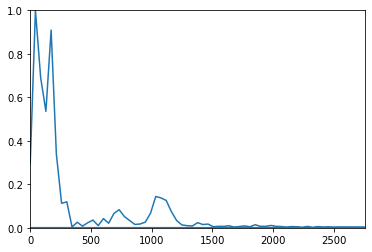

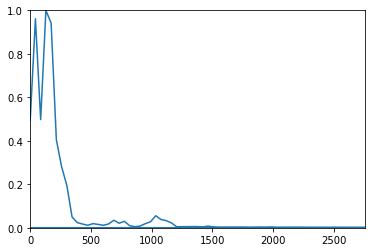

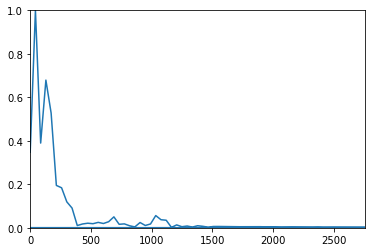

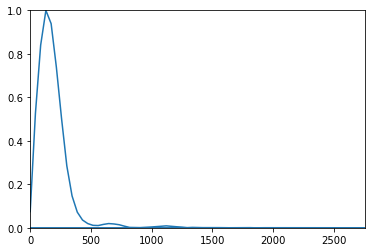

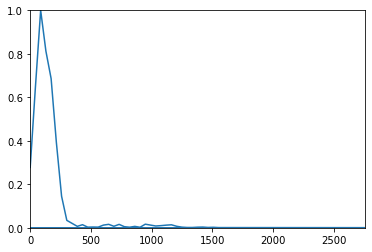

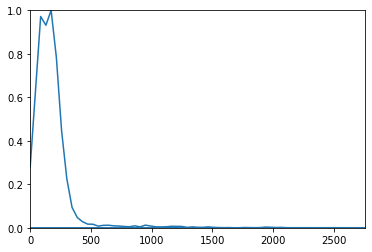

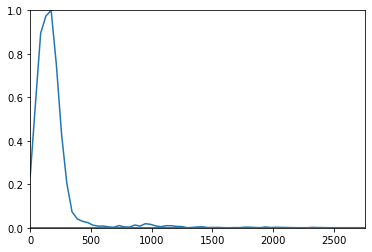

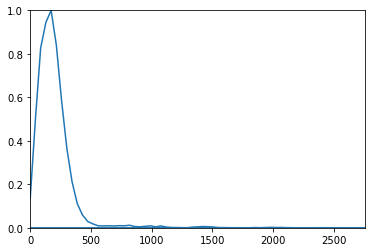

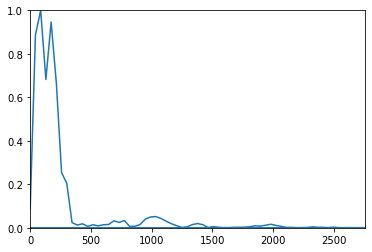

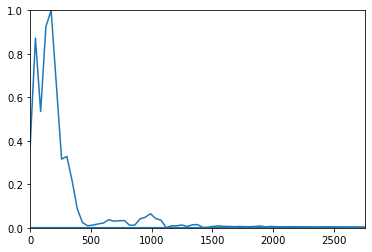

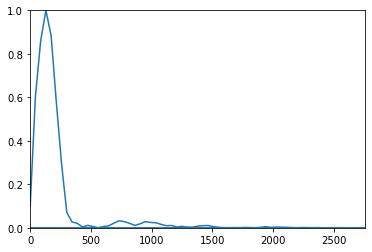

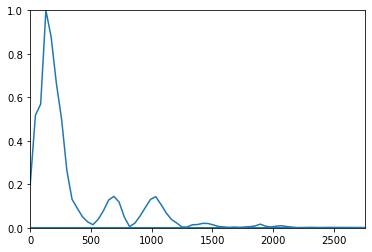

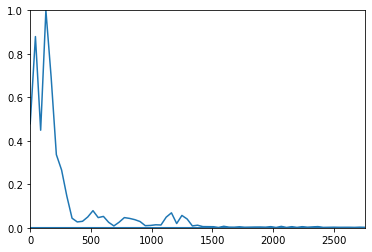

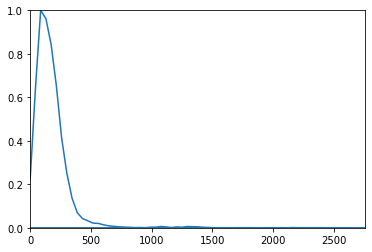

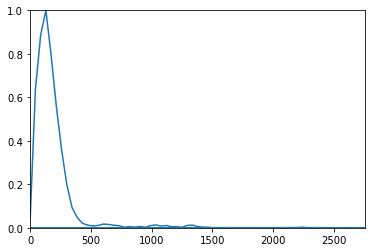

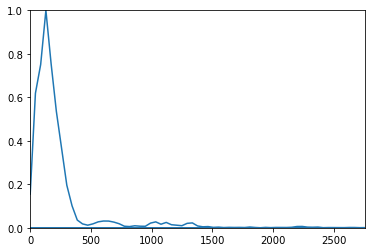

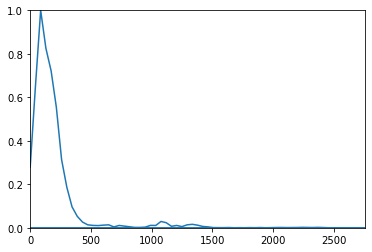

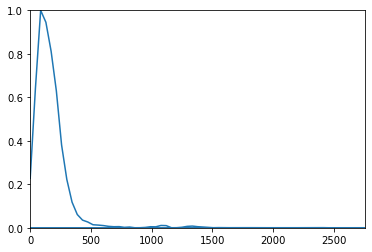

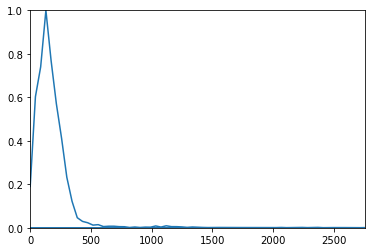

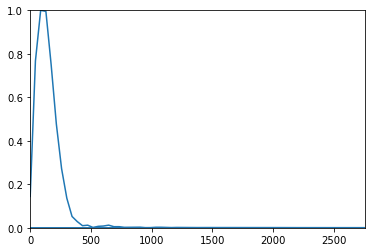

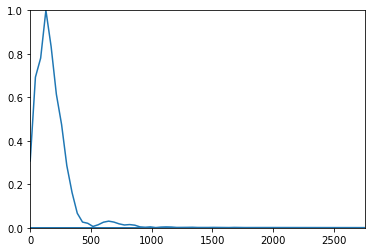

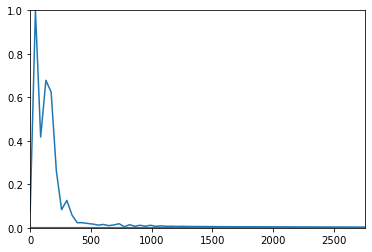

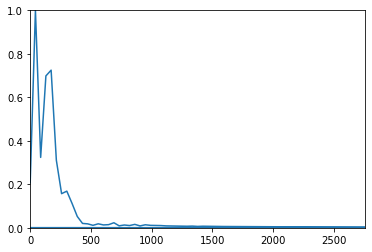

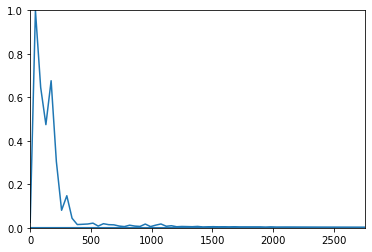

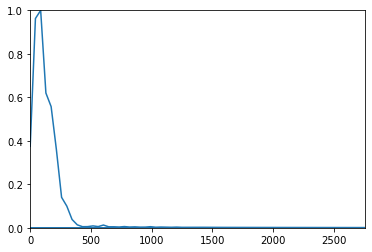

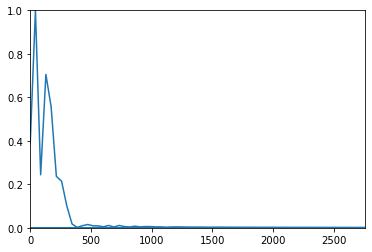

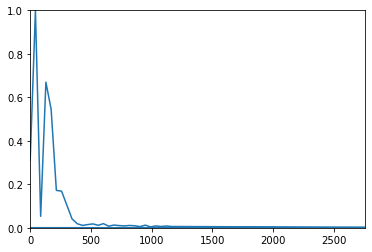

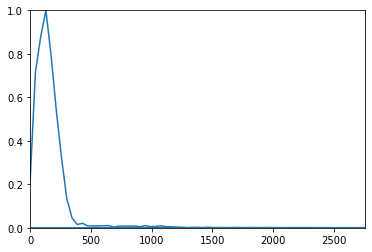

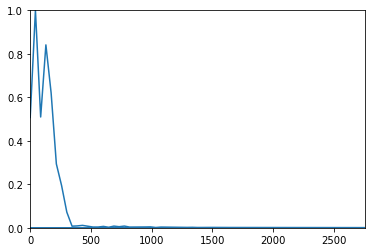

FileNotFoundError: [Errno 2] No such file or directory: './bass/3A/121.wav'

In [2]:
fft_load(120,"3A",1024)